In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Sectores que han tenido mejor desempeño en los últimos años:

XLB: Materiales básicos

XLC: Comunicaciones

XLY: Consumo discrecional

XLP: Productos básicos de consumo

XLE: Energía

XLF: Finanzas

XLV: Cuidado de la salud

XLI: Industriales

XLK: Tecnología de la información

XLU: Servicios públicos

Son los 10 sectores principales en los que se divide el índice.

Rendimiento Anual (medida útil para comparar el rendimiento de diferentes inversiones en un mismo período de tiempo, como un año, y para estimar el rendimiento que se puede esperar en el futuro)

In [1]:
#Librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression
import datetime as dt

In [22]:
# Descargar datos históricos del S&P 500 y de los sectores
tickers = ["SPY", "XLC", "XLY", "XLP", "XLE", "XLF", "XLV", "XLI", "XLK", "XLU", "XLB"]
data_sect = yf.download(tickers, start="2000-01-01", end="2023-06-01")

[*********************100%***********************]  11 of 11 completed


In [23]:
# Vistazo
data_sect.head(1)

Adj Close                                                \
                  SPY        XLB XLC        XLE       XLF       XLI   
Date                                                                  
2000-01-03  94.946472  15.332276 NaN  14.677699  11.64103  18.90196   

                                                        ...  Volume      \
                  XLK        XLP        XLU        XLV  ...     XLB XLC   
Date                                                    ...               
2000-01-03  42.116333  13.171584  12.086851  21.487967  ...  140500 NaN   

                                                                            
               XLE      XLF    XLI     XLK     XLP     XLU     XLV     XLY  
Date                                                                        
2000-01-03  380300  1185699  82800  938100  634300  176700  246700  212900  

[1 rows x 66 columns]

In [24]:
# Filtro por Precio Ajustado
data_adj = data_sect['Adj Close']
data_adj

,SPY,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,
2000-01-03,94.946472,15.332276,NaN,14.677699,11.641030,18.901960,42.116333,13.171584,12.086851,21.487967,22.854637
2000-01-04,91.233459,15.184674,NaN,14.401414,11.132131,18.379747,39.979645,12.800683,11.722248,21.000355,22.167105
2000-01-05,91.396690,15.811980,NaN,14.781305,11.044667,18.297829,39.386127,13.026844,12.018056,20.811956,21.894453
2000-01-06,89.927818,16.217890,NaN,15.351151,11.529708,18.543575,38.080383,13.271104,11.997417,20.878458,22.143389
2000-01-07,95.150482,16.208673,NaN,15.515192,11.720543,19.250105,38.745132,14.112420,12.100609,21.133337,23.186548
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-24,411.089996,76.129997,60.919998,80.510002,31.860001,97.290001,154.309998,73.739998,65.470001,129.110001,149.149994
2023-05-25,414.649994,75.860001,60.919998,79.080002,31.850000,97.610001,160.229996,73.180000,64.589996,127.790001,148.479996
2023-05-26,420.019989,76.239998,62.160000,78.769997,32.110001,98.339996,164.779999,73.430000,64.589996,127.529999,151.970001


In [38]:
#Guardar datos de Precio Ajustado
#data_adj.to_excel("/content/drive/MyDrive/EDA/10_Sectores_PrecioAjustado.xlsx", index=False)

In [25]:
# Filtro por Volumen
data_vol = data_sect['Volume']
data_vol

,SPY,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,
2000-01-03,8164300,140500,NaN,380300,1185699,82800,938100,634300,176700,246700,212900
2000-01-04,8089800,258000,NaN,722200,885705,146900,545500,172000,93500,35300,177200
2000-01-05,12177900,102700,NaN,337800,717181,129200,1906000,343600,273400,137600,124600
2000-01-06,6227200,1335000,NaN,133100,415832,54000,1670000,420800,34500,50000,135800
2000-01-07,8066500,620100,NaN,468000,468149,32900,686000,337100,46200,22100,70000
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-24,89213700,7063800,6112700.0,16737100,46610700,11654900,5462800,11901800,11563800,7952900,3476200
2023-05-25,90961600,5856500,5962500.0,19125500,41658900,14259300,9039000,17725000,16126100,13737000,3998900
2023-05-26,93830000,7941300,8314700.0,14392900,44183000,10790500,7580000,15531000,16593900,8794900,5205100


In [39]:
#Guardar datos de Volumen
#data_vol.to_excel("/content/drive/MyDrive/EDA/10_Sectores_Volumen.xlsx", index=False)

In [26]:
# Filtro por Precio bajo
data_bajo = data_sect['Low']
data_bajo

,SPY,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,
2000-01-03,143.875000,25.937500,NaN,26.375000,18.455524,28.687500,53.500000,22.468750,27.218750,30.062500,29.859375
2000-01-04,139.640625,25.609375,NaN,25.875000,17.605097,27.937500,52.312500,22.078125,26.625000,29.531250,29.031250
2000-01-05,137.250000,25.750000,NaN,26.000000,17.440088,27.718750,50.125000,22.093750,26.859375,29.218750,28.718750
2000-01-06,137.750000,26.781250,NaN,26.750000,17.681255,27.812500,49.625000,22.484375,26.937500,29.156250,29.000000
2000-01-07,140.062500,27.453125,NaN,27.687500,18.277822,28.625000,49.125000,23.265625,27.171875,29.359375,29.500000
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-24,409.880005,75.980003,60.570000,79.830002,31.790001,97.150002,153.470001,73.680000,65.360001,128.809998,147.990005
2023-05-25,412.410004,75.440002,60.750000,78.339996,31.660000,96.739998,157.580002,72.629997,64.129997,126.910004,147.979996
2023-05-26,415.250000,75.900002,60.740002,78.360001,31.870001,97.779999,160.619995,72.860001,63.930000,127.290001,148.580002


In [40]:
#Guardar datos de precio bajo
#data_bajo.to_excel("/content/drive/MyDrive/EDA/10_Sectores_Bajo.xlsx", index=False)

In [27]:
# Filtro por Precio Alto
data_alto = data_sect['High']
data_alto

,SPY,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,
2000-01-03,148.250000,26.687500,NaN,27.312500,19.267872,29.484375,55.625000,23.125000,28.937500,31.000000,31.000000
2000-01-04,144.062500,26.046875,NaN,26.312500,18.201666,28.609375,54.750000,22.656250,27.468750,30.203125,29.812500
2000-01-05,141.531250,26.812500,NaN,26.750000,17.960501,28.125000,53.062500,22.609375,27.421875,29.781250,29.343750
2000-01-06,141.500000,27.734375,NaN,27.843750,18.518990,28.375000,52.093750,23.000000,27.250000,29.562500,29.406250
2000-01-07,145.750000,27.937500,NaN,28.406250,18.734768,29.375000,51.000000,24.421875,27.484375,29.796875,30.562500
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-24,412.820007,76.750000,61.205002,81.129997,32.070000,98.300003,154.929993,74.300003,66.050003,129.779999,149.940002
2023-05-25,416.160004,76.230003,61.540001,79.519997,31.959999,97.849998,160.860001,73.440002,65.379997,128.660004,149.800003
2023-05-26,420.769989,76.720001,62.200001,79.779999,32.189999,98.720001,165.070007,73.550003,64.639999,128.869995,153.070007


In [41]:
#Guardar datos de precio alto
data_alto.to_excel("/content/drive/MyDrive/EDA/10_Sectores_Alto.xlsx", index=False)

In [28]:
# Calcular el rendimiento anual para cada acción, respecto al Precio Ajustado
data_adj = data_adj.pct_change().groupby([data_sect.index.year]).mean()
data_adj

,SPY,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,
2000,-0.000256,-0.000423,NaN,1.110769e-03,0.001287,0.000482,-0.001899,0.001080,0.001009,-0.000285,-0.000412
2001,-0.000408,0.000230,NaN,-6.746831e-04,-0.000273,-0.000307,-0.000634,-0.000351,-0.000488,0.000092,0.000652
2002,-0.000827,-0.000052,NaN,-4.658364e-04,-0.000440,-0.000960,-0.001560,-0.000815,-0.001139,0.000102,-0.000654
2003,0.001040,0.001331,NaN,9.621122e-04,0.001134,0.001160,0.001424,0.000457,0.000987,0.000606,0.001340
2004,0.000428,0.000560,NaN,1.223253e-03,0.000439,0.000681,0.000277,0.000312,0.000869,0.000083,0.000514
2005,0.000208,0.000209,NaN,1.471102e-03,0.000267,0.000135,0.000017,0.000127,0.000644,0.000268,-0.000236
2006,0.000606,0.000735,NaN,7.848363e-04,0.000716,0.000534,0.000497,0.000554,0.000781,0.000291,0.000701
2007,0.000250,0.000896,NaN,1.376062e-03,-0.000733,0.000555,0.000626,0.000499,0.000734,0.000305,-0.000525
2008,-0.001477,-0.001853,NaN,-1.206506e-03,-0.002134,-0.001643,-0.001787,-0.000528,-0.001080,-0.000874,-0.001200


In [29]:
# Calcular el rendimiento anual para cada sector
sector_returns = data_adj.mean()
sector_returns

SPY    0.000344
XLB    0.000372
XLC    0.000437
XLE    0.000418
XLF    0.000321
XLI    0.000361
XLK    0.000425
XLP    0.000323
XLU    0.000336
XLV    0.000347
XLY    0.000457
dtype: float64

In [30]:
# Ordenar los sectores por rendimiento anual promedio
sector_returns.sort_values(ascending=False)

XLY    0.000457
XLC    0.000437
XLK    0.000425
XLE    0.000418
XLB    0.000372
XLI    0.000361
XLV    0.000347
SPY    0.000344
XLU    0.000336
XLP    0.000323
XLF    0.000321
dtype: float64

- Rendimiento Anual:

El mercado en general ha tenido un buen desempeño en este período.

Es importante tener en cuenta que los resultados del rendimiento pasado no garantizan el rendimiento futuro

Obteniendo los sectores con el mejor rendimiento anual desde el año 2000 a la actualidad, ordenados del mejor en adelante

XLY: Consumo discrecional

XLC: Comunicaciones

XLK: Tecnología de la información

XLE: Energía

XLB: Materiales básicos

XLI: Industriales

XLV: Cuidado de la salud

XLU: Servicios públicos

XLF: Finanzas

XLP: Productos básicos de consumo

XLF: Finanzas


Rendimiento Total (el rendimiento total es una medida útil para evaluar el rendimiento de una inversión a lo largo de todo el período en que se ha mantenido. Esta medida toma en cuenta todos los cambios en el valor de la inversión, tanto positivos como negativos, y muestra cuánto ha crecido o disminuido el valor de la inversión desde que se inició)

In [31]:
# Calcular el rendimiento diario, teniendo el cuenta el precio ajustado
returns_tot = data_adj.pct_change()

In [32]:
# Calcular el rendimiento total acumulado desde el inicio de los datos históricos
tot_returns = (1 + returns_tot).cumprod() - 1

In [33]:
# Resultados de las ultimas 5 filas, da una idea de cómo han evolucionado los rendimientos recientemente.
tot_returns.tail(1)

,SPY,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,
2023,-4.678812,-0.459613,-3.078944,-1.942815,-1.459918,-1.084869,-2.47941,-1.160834,-1.661748,0.832701,-5.077867


- Rendimiento Total:

La columna "SPY" muestra el rendimiento total acumulado del índice S&P 500

Las demás columnas muestran el rendimiento total acumulado de los distintos sectores. 

Los valores se expresan como un porcentaje, lo que significa que un valor de 1,0 representa un rendimiento total del 100%.

Si ordenamos los sectores desde el mayor rendimiento total en adelante sería:

XLV:Cuidado de la salud

XLB:Materiales básicos

XLI:Industriales

XLP:Productos básicos de consumo

XLF:Finanzas

XLU:Servicios públicos

XLE:Energía

XLK:Tecnología de la información

XLC:Comunicaciones

XLY:Consumo discrecional

Identificar oportunidades de inversión en sectores especificos.

Se debe tener en cuenta que el rendimiento general del mercado de valores de EE. UU. puede influir en el rendimiento del SPY

In [34]:
# Descargar datos históricos para rendimiento total
tickers_sec = ["XLC", "XLY", "XLP", "XLE", "XLF", "XLV", "XLI", "XLK", "XLU", "XLB"]
data_sect_total = yf.download(tickers_sec, start="2000-01-01", end="2023-06-01")

[*********************100%***********************]  10 of 10 completed


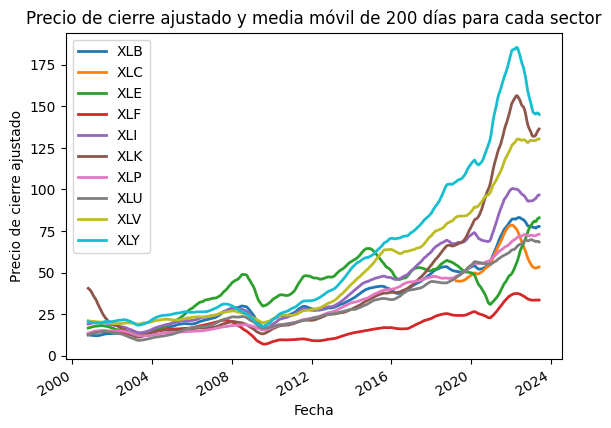

In [35]:
# Visualizar las tendencias de estos sectores a largo plazo
# Calcular la media móvil de 200 días
ma = data_sect_total['Adj Close'].rolling(window=200).mean()

# Visualizar la tendencia del precio de cierre ajustado y la media móvil de 200 días para cada sector
#data_sect_total['Adj Close'].plot(figsize=(10, 5))
ma.plot(label='MA(200)', linewidth=2)

plt.title('Precio de cierre ajustado y media móvil de 200 días para cada sector')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre ajustado')
plt.legend()
plt.show()

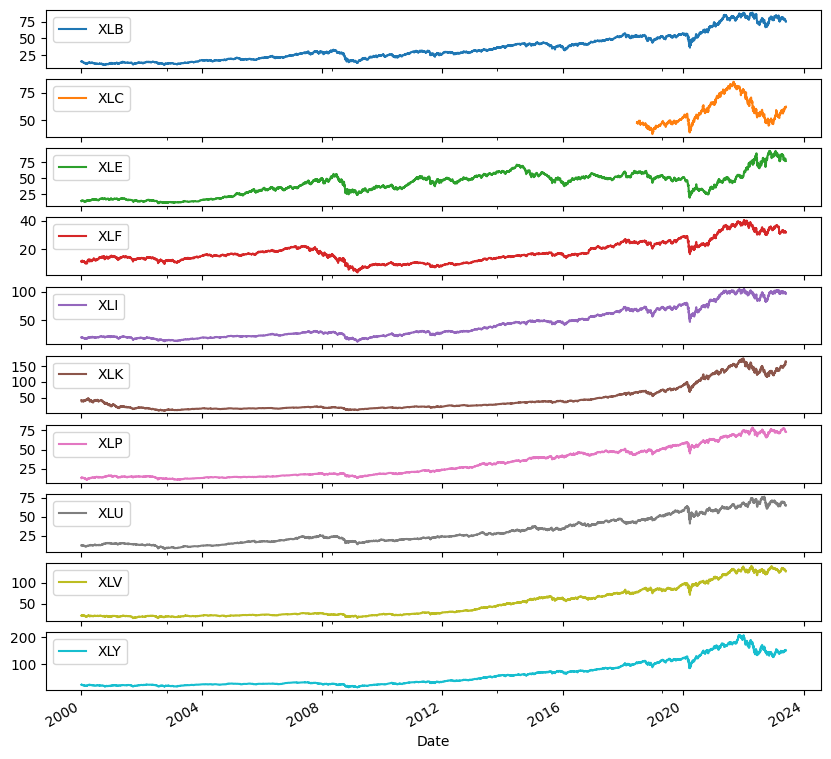

In [36]:
# Visualizar los precios de cierre ajustados para cada sector
data_sect_total['Adj Close'].plot(subplots=True, figsize=(10, 10))
plt.show()

- Conclusión:

Al visualizar los precios de cierre ajustados de cada sector, se pueden identificar patrones y tendencias que pueden indicar oportunidades de inversión, como asi es en:

XLY(Consumo discrecional)

XLK(Tecnología de la información)

XLV(Cuidado de la salud)

XLI(Industriales)

Los cuales han finalizado estos ultimos dás con sus cierres ajustados por encima de los 100.